In [2]:
import pandas as pd
url = 'bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [4]:
bikes.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


In [6]:
bikes.rename(columns={'count':'total'}, inplace=True)

In [8]:
#Data Visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

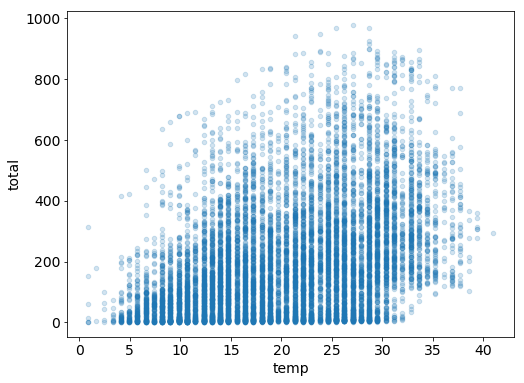

In [10]:
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.2)

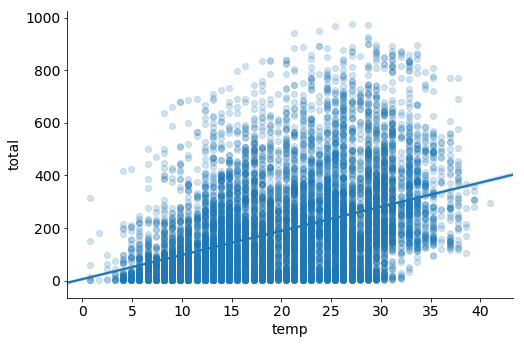

In [12]:
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [15]:
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total

In [17]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print linreg.intercept_
print linreg.coef_

6.04621295962
[ 9.17054048]


In [21]:
linreg.intercept_ + linreg.coef_*25

array([ 235.309725])

In [23]:
linreg.predict(25)

array([ 235.309725])

In [25]:
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,49.712
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,49.712
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,48.236
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,46.760
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,49.712


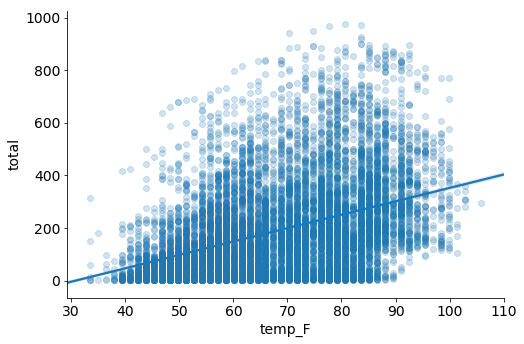

In [27]:
sns.lmplot(x='temp_F', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [29]:
feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes.total

linreg = LinearRegression()
linreg.fit(X, y)

print linreg.intercept_
print linreg.coef_

-156.985617821
[ 5.09474471]


In [31]:
25 * 1.8 + 32

77.0

In [35]:
linreg.predict(77)

array([ 235.309725])

In [39]:
feature_cols = ['temp', 'season', 'weather', 'humidity']

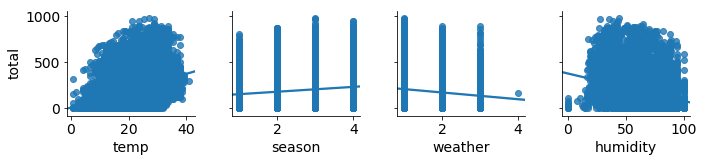

In [41]:
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total', kind='reg')

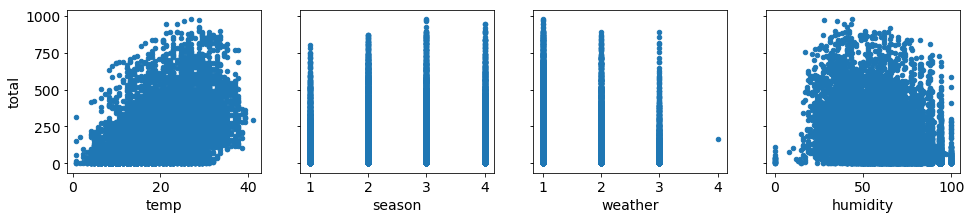

In [43]:
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='total', ax=axs[index], figsize=(16, 3))

In [45]:
pd.crosstab(bikes.season, bikes.index.month)

col_0,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


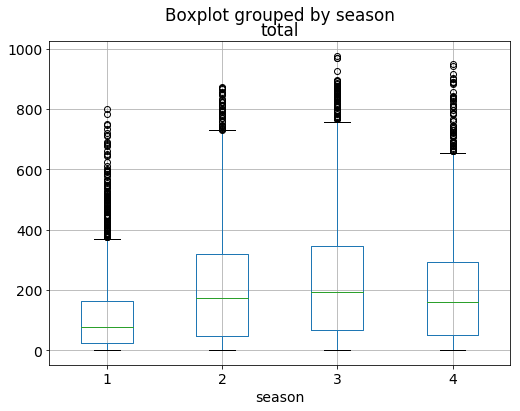

In [47]:
bikes.boxplot(column='total', by='season')

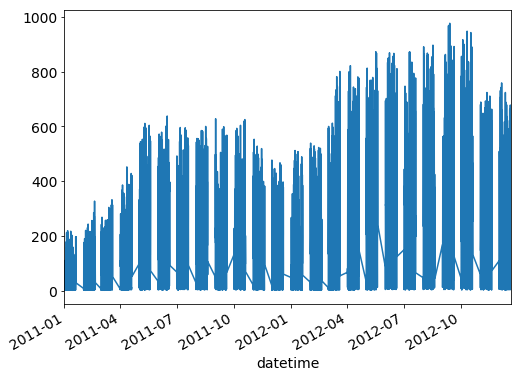

In [49]:
bikes.total.plot()

In [51]:
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


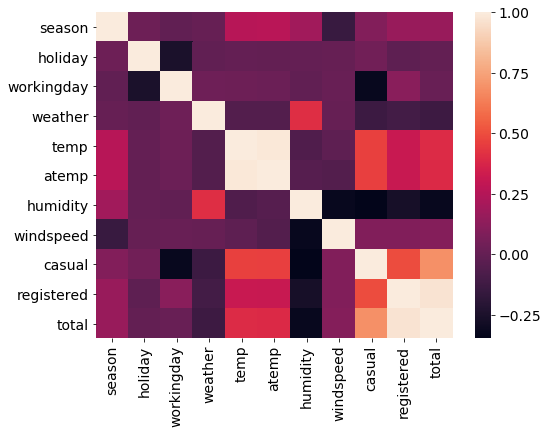

In [53]:
sns.heatmap(bikes.corr())

In [55]:
feature_cols = ['temp', 'season', 'weather', 'humidity']

In [57]:
X = bikes[feature_cols]
y = bikes.total

linreg = LinearRegression()
linreg.fit(X, y)

print linreg.intercept_
print linreg.coef_

159.520687861
[  7.86482499  22.53875753   6.67030204  -3.11887338]


In [59]:
zip(feature_cols, linreg.coef_)

[('temp', 7.8648249924774083),
 ('season', 22.538757532466601),
 ('weather', 6.6703020359238376),
 ('humidity', -3.1188733823965045)]

In [61]:
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]

In [63]:
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(true, pred)
print 'MSE:', metrics.mean_squared_error(true, pred)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(true, pred))

MAE: 2.0
MSE: 7.5
RMSE: 2.73861278753


In [65]:
true = [10, 7, 5, 5]
pred = [10, 7, 5, 13]
print 'MAE:', metrics.mean_absolute_error(true, pred)
print 'MSE:', metrics.mean_squared_error(true, pred)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(true, pred))

MAE: 2.0
MSE: 16.0
RMSE: 4.0


In [67]:
from sklearn.cross_validation import train_test_split
def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [69]:
print train_test_rmse(['temp', 'season', 'weather', 'humidity'])
print train_test_rmse(['temp', 'season', 'weather'])
print train_test_rmse(['temp', 'season', 'humidity'])

155.649459131
164.165399763
155.598189367


In [71]:
print train_test_rmse(['casual', 'registered'])

2.76616750363e-13


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
y_null

array([ 192.26451139,  192.26451139,  192.26451139, ...,  192.26451139,
        192.26451139,  192.26451139])

In [75]:
np.sqrt(metrics.mean_squared_error(y_test, y_null))

179.57906896465727

In [77]:
season_dummies = pd.get_dummies(bikes.season, prefix='season')

In [79]:
season_dummies.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0,0,1,0
2012-03-18 04:00:00,1,0,0,0
2012-10-14 17:00:00,0,0,0,1
2011-04-04 15:00:00,0,1,0,0
2012-12-11 02:00:00,0,0,0,1


In [81]:
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)
season_dummies.sample(n=5, random_state=1)

,season_3,season_4
datetime,,
2011-09-05 11:00:00,1,0
2012-03-18 04:00:00,0,0
2012-10-14 17:00:00,0,1
2011-04-04 15:00:00,0,0
2012-12-11 02:00:00,0,1


In [87]:
bikes = pd.concat([bikes, season_dummies], axis=1)
bikes.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_3,season_4,season_3,season_4,season_3,season_4,season_3,season_4
datetime,,,,,,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,1,0,1,0,1,0,1,0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,0,0,0,0,0,0,0,0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,0,1,0,1,0,1,0,1
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,0,0,0,0,0,0,0,0
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,0,1,0,1,0,1,0,1


In [89]:
bikes['hour'] = bikes.index.hour

In [91]:
hour_dummies = pd.get_dummies(bikes.hour, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
bikes = pd.concat([bikes, hour_dummies], axis=1)

In [93]:
bikes['daytime'] = ((bikes.hour > 6) & (bikes.hour < 21)).astype(int)

In [94]:
print train_test_rmse(['hour'])
print train_test_rmse(bikes.columns[bikes.columns.str.startswith('hour_')])
print train_test_rmse(['daytime'])

165.671742641
128.688577603
144.891163602
